# Projet : 5 
# Segmentez des clients d'un site e-commerce

#### Contexte

Olist souhaite que vous fournissiez à son équipe d'e-commerce une segmentation des clients qui sera utilisée quotidiennement pour leurs campagnes de communication.

L'objectif est de comprendre les différents types d'utilisateurs en se basant sur leur comportement et leurs données personnelles.

Vous devrez présenter à l'équipe marketing une description pratique de la segmentation ainsi que de sa logique sous-jacente, afin qu'elle puisse l'utiliser de manière optimale. De plus, vous devrez proposer un contrat de maintenance basé sur une analyse de la stabilité des segments dans le temps.

Pour répondre à la demande spécifique d'Olist :

- La segmentation proposée doit être facilement exploitable et compréhensible par l'équipe marketing.
- Vous devrez évaluer la fréquence à laquelle la segmentation doit être mise à jour, ce qui permettra de fournir un devis pour le contrat de maintenance.
- Assurez-vous que le code que vous fournirez respecte la convention PEP8, afin qu'il puisse être utilisé par Olist.

## Première Partie : Analyse_Exploratoire


### Importation des Packages

In [1]:
# Importation des bibliothèques.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import radians, cos, sin, asin, sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Description des données
#### Chargement des datasets
Nous allons importer l'ensemble des jeux de données afin de visualiser leurs principales informations :

In [2]:
# Chemin principal pour tous les jeux de données.
root_path = '../input/brazilian-ecommerce/'
# On affiche les chemins menant à nos datasets.
customers = pd.read_csv('olist_customers_dataset.csv')
geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')

##### Les clients

In [3]:
# On affiche les 3 premières lignes du DataFrame(customers)
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Les variables clés du jeu de données sont les suivantes :


- customer_id : Clé dans le jeu de données des commandes
- customer_unique_id : Identifiant exclusif du client
- customer_state : État du client

In [4]:
# Affiche des informations sur la structure et les types de données dans le DataFrame 'customers'.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


- Le jeu de données ne présente aucune valeur nulle.

##### Les données de géolocalisation

In [5]:
# On affiche les 2 premières lignes du DataFrame(geolocalisation)
geolocalisation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [6]:
# Affiche des informations sur la structure et les types de données dans le DataFrame 'geolocalisation'.
geolocalisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


- Ce fichier contient plus d'un million de lignes et aucune valeur nulle n'est présente. Il est lié au fichier des clients par le biais de la clé "geolocation_zip_code_prefix". Examinons la description du fichier pour obtenir un aperçu des plages de latitudes et de longitudes :

In [7]:
# Description du jeu de données de géolocalisation
geolocalisation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


##### Les articles

In [8]:
# On affiche les 2 premières lignes du DataFrame(order_items)
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [9]:
# Affiche des informations sur la structure et les types de données dans le DataFrame 'order_items'.
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Variables clés du jeu de données regroupant les lignes de commandes :


- order_id : Identifiant exclusif de la commande
- order_item_id : Identifiant séquentiel des articles d'une même commande (lignes de commande)
- product_id : Identifiant unique du produit
- seller_id : Identifiant exclusif du vendeur
- price : Prix de la ligne de commande
- freight_value : Coût d'expédition de la ligne (Si plusieurs articles, le coût d'expédition est réparti entre tous les articles)

##### Les reglements

In [10]:
# On affiche les 2 premières lignes du DataFrame(order_payments)
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


payment_sequential : Lorsque plusieurs méthodes de paiement sont utilisées, une ligne est créée pour chaque moyen employé.
payment_installments : Nombre de versements sélectionnés.

In [11]:
# Affiche des informations sur la structure et les types de données dans le DataFrame 'order_payments'.
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


##### Commentaires  Clients

In [12]:
# On affiche les 2 premières lignes du DataFrame(order_reviews)
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


- Ce jeu de données concerne les avis clients liés à une commande. Il comprend une note ainsi qu'un commentaire.

In [13]:
# Affiche des informations sur la structure et les types de données dans le DataFrame 'order_reviews'.
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Créer une nouvelle colonne 'Taille_de_commentaire' avec la longueur des commentaires

In [14]:
# Créer une nouvelle colonne 'Taille_de_commentaire' avec la longueur des commentaires
order_reviews['comment_size'] = order_reviews['review_comment_message'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
print(order_reviews.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

##### Les commandes clients

In [15]:
# On affiche les 2 premières lignes du DataFrame(orders)
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


- Ce document rassemble les en-têtes de commandes, identifiés par un order_id unique et associés à des clients grâce au customer_id.

In [16]:
# Affiche des informations sur la structure et les types de données dans le DataFrame 'order'.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


##### Les produits

In [17]:
# On affiche les 2 premières lignes du DataFrame(products)
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


- Ce jeu de données rassemble les catégories de produits ainsi que différentes caractéristiques telles que les dimensions et le poids.

In [18]:
# Affiche des informations sur la structure et les types de données dans le DataFrame 'products'.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


##### Les vendeurs

In [19]:
# On affiche les 2 premières lignes du DataFrame(sellers)
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


##### Categories traduites

In [20]:
#On affiche les 2 premières lignes du DataFrame(translation)
translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [21]:
# Affiche des informations sur la structure et les types de données dans le DataFrame 'translation'.
translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


- Les catégories traduites et les produits sont reliés par la variable "product_category_name". Étant donné que les vendeurs ne sont pas le sujet de cette analyse, le jeu de données associé à eux sera omis dans ce contexte.

### Création des datasets étendus
#### Produits et catégories

Maintenant, nous allons élaborer des ensembles de données plus complets en effectuant des jointures avec les informations sur les produits et les catégories. Dans un premier temps, nous allons supprimer les variables qui ne seront pas pertinentes pour notre modèle RFM :

In [22]:
# Fusion des données produits avec les traductions de catégories
products = pd.merge(products, translation,
                    how="left",
                    on="product_category_name")

# Liste des fonctionnalités à supprimer
del_features_list = ["product_category_name", "product_weight_g",
                     "product_length_cm", "product_height_cm",
                     "product_width_cm"]

# Suppression des fonctionnalités spécifiées
products.drop(del_features_list, axis=1, inplace=True)
# Renommage de la colonne "product_category_name_english"
products = products.rename(columns={"product_category_name_english":
                                    "product_category_name"})
# Affichage des 6 premières lignes du jeu de données produits
products.head(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares


Nous pouvons visualiser la répartition des diverses catégories de produits

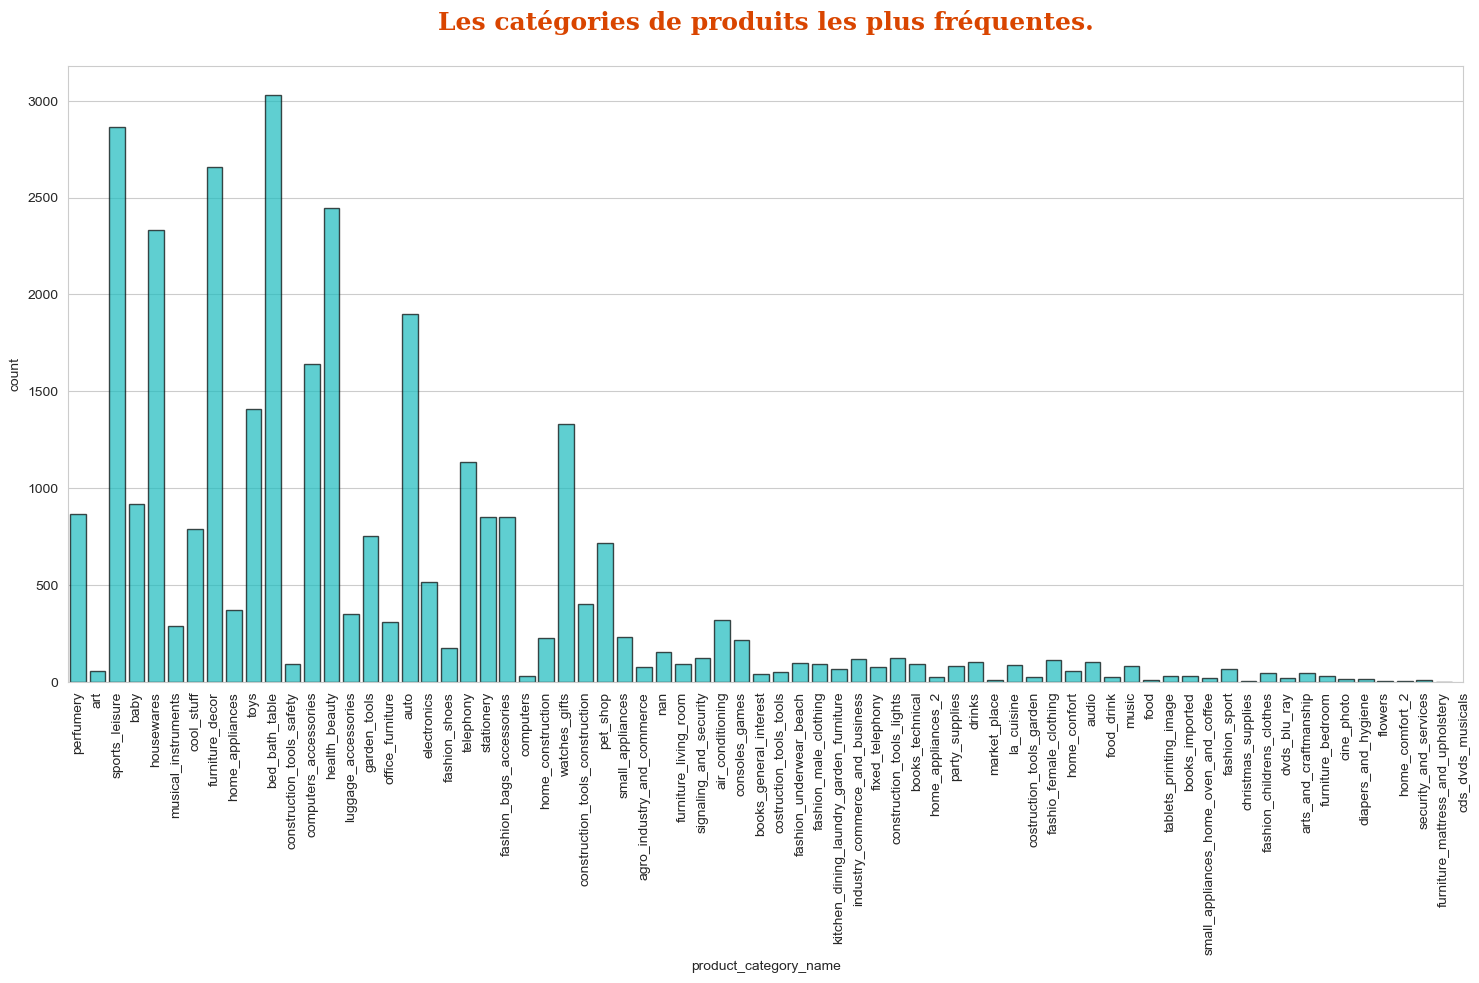

In [23]:
# Tracé du nombre de catégories dans le jeu de données
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#d94500",
              "weight": "bold",
              "size": 18}

fig = plt.figure(figsize=(18, 8))
sns.countplot(data=products, x="product_category_name",
              edgecolor="black",
              color="#00d5d9", alpha=0.7)
plt.xticks(range(0, products["product_category_name"].nunique()+1),
           products["product_category_name"].unique(),
           rotation=90)
plt.title(f"Les catégories de produits les plus fréquentes.\n",
          fontdict=font_title)
plt.show()

#### Commandes et clients

Nous allons fusionner les données des lignes de commandes, des en-têtes de commandes et des informations clients au sein d'un seul dataframe.

In [24]:
# Fusion des données des articles de commande avec les informations de commande
order_items = pd.merge(order_items, orders,
                       how="left",
                       on="order_id")
# Liste des fonctionnalités à supprimer
del_features_list = ["seller_id", "shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date",
                     "order_estimated_delivery_date"]
# Suppression des fonctionnalités spécifiées
order_items.drop(del_features_list,
                 axis=1,
                 inplace=True)
# Affichage des 5 premières lignes du jeu de données des articles de commande
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


Examinons les divers états de commande afin de filtrer et conserver uniquement celles qui ne sont pas actuellement "en cours".

In [25]:
# Regroupement par statut de commande et somme des identifiants d'articles de commande
order_items.groupby(by="order_status").sum()["order_item_id"]

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_6084/1048789563.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_items.groupby(by="order_status").sum()["order_item_id"]


order_status
approved            4
canceled          704
delivered      132036
invoiced          435
processing        455
shipped          1294
unavailable         8
Name: order_item_id, dtype: int64

Nous conserverons les lignes typées "delivered".

In [26]:
# Filtrage pour ne conserver que les articles de commande "livrés"
order_items = order_items[order_items["order_status"] == "delivered"]

Nous pouvons également vérifier l'évolution du nombre de commandes passées par jour sur le site E-Commerce :

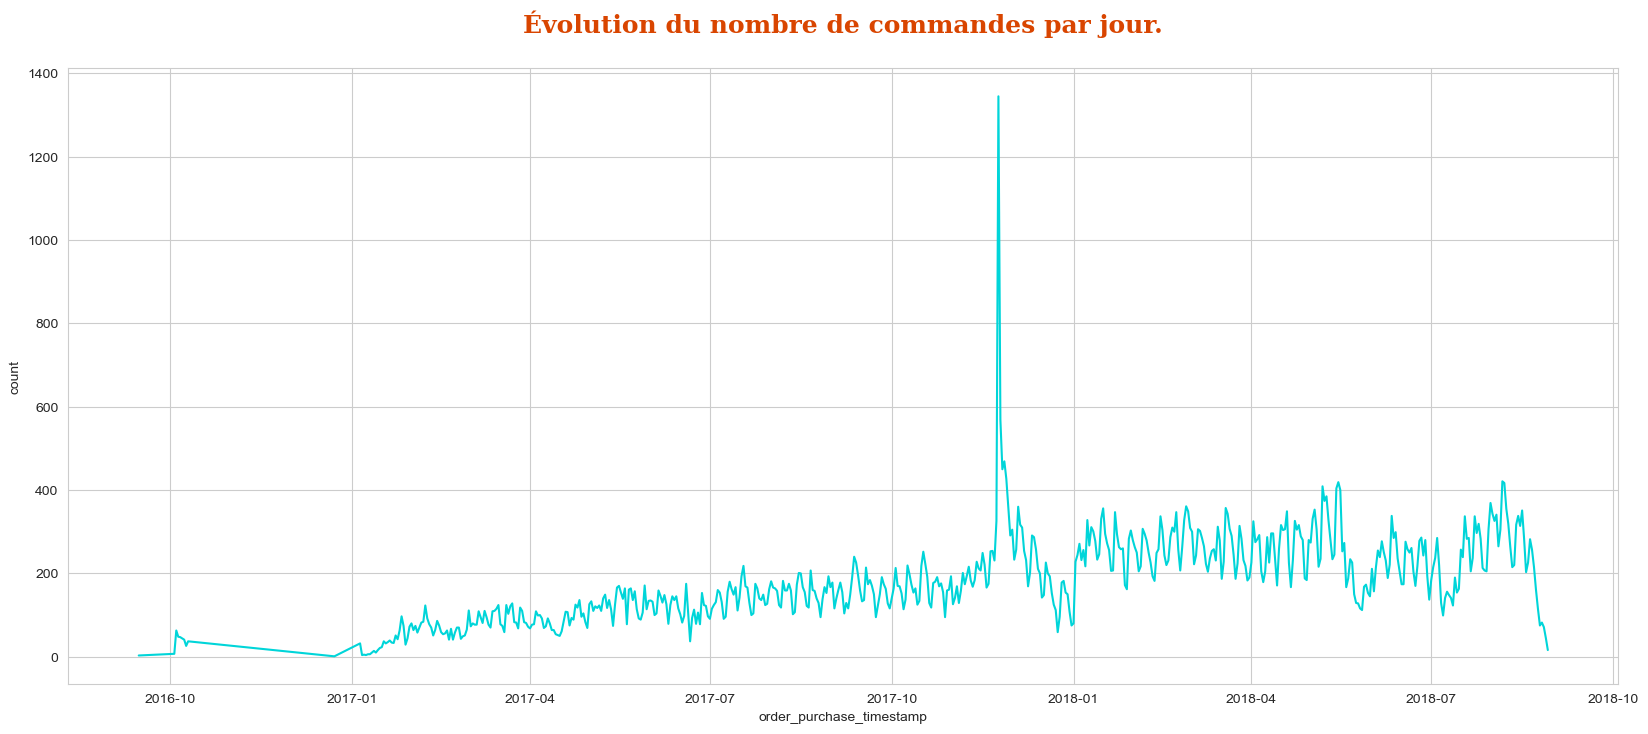

In [27]:
# Groupement par jours et comptage des commandes par jour d'achat
orders_per_days = order_items.groupby(order_items["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
# Tracé de l'évolution du nombre de commandes par jour
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="#00d5d9")
ax.set_ylabel("count")
plt.title(f"Évolution du nombre de commandes par jour.\n",
          fontdict=font_title)
plt.show()

On observe un pic anormal autour de Novembre /décembre 2017 (pouvant correspondre aux achats de cadeaux de fin d'année), ainsi qu'une période sans commandes entre octobre 2016 et janvier 2017.

Nous allons procéder à la conversion des types de données en format datetime pour les colonnes temporelles.

In [28]:
# Modification des colonnes de type objet au format de timestamp
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    order_items[col] = order_items[col].astype('datetime64[ns]')
# Affichage des informations sur le jeu de données des articles de commande    
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.4+ MB


Nous pouvons également examiner comment le nombre de commandes est réparti selon les mois, les jours de la semaine et les heures de la journée :

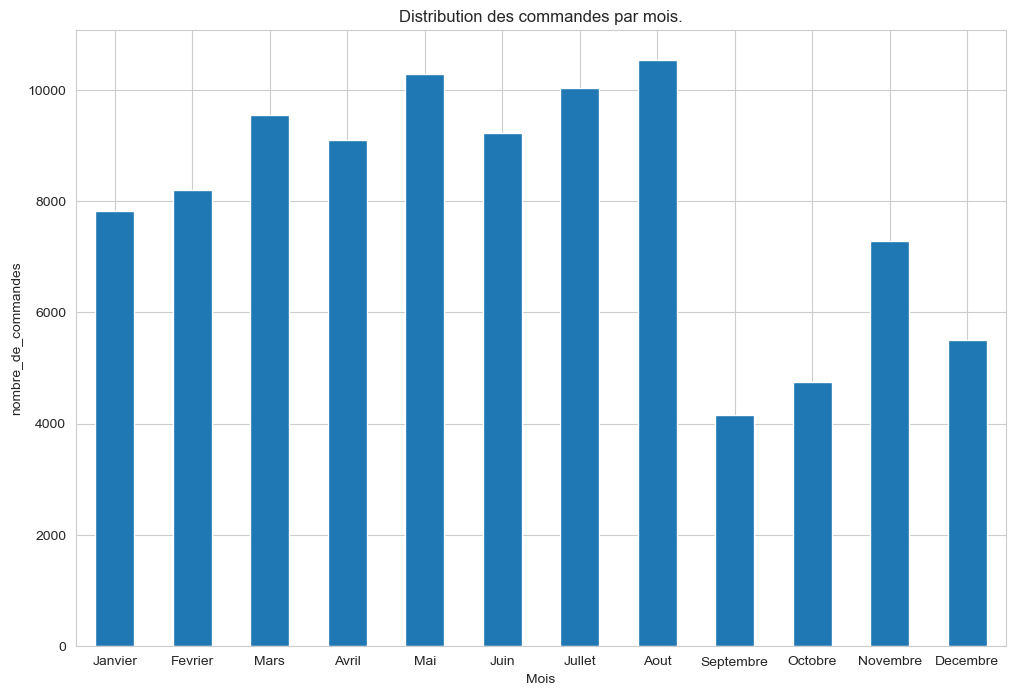

In [29]:
# Groupement par mois et comptage des commandes uniques par mois
order_items.groupby(order_items['order_purchase_timestamp'].dt.month)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Distribution des commandes par mois.",
          ylabel="nombre_de_commandes",
          xlabel="Mois",
          legend=False)
plt.xticks(np.arange(0,12), ['Janvier','Fevrier','Mars','Avril','Mai','Juin',
                             'Jullet','Aout','Septembre','Octobre','Novembre','Decembre'], 
           rotation='horizontal')
plt.show()

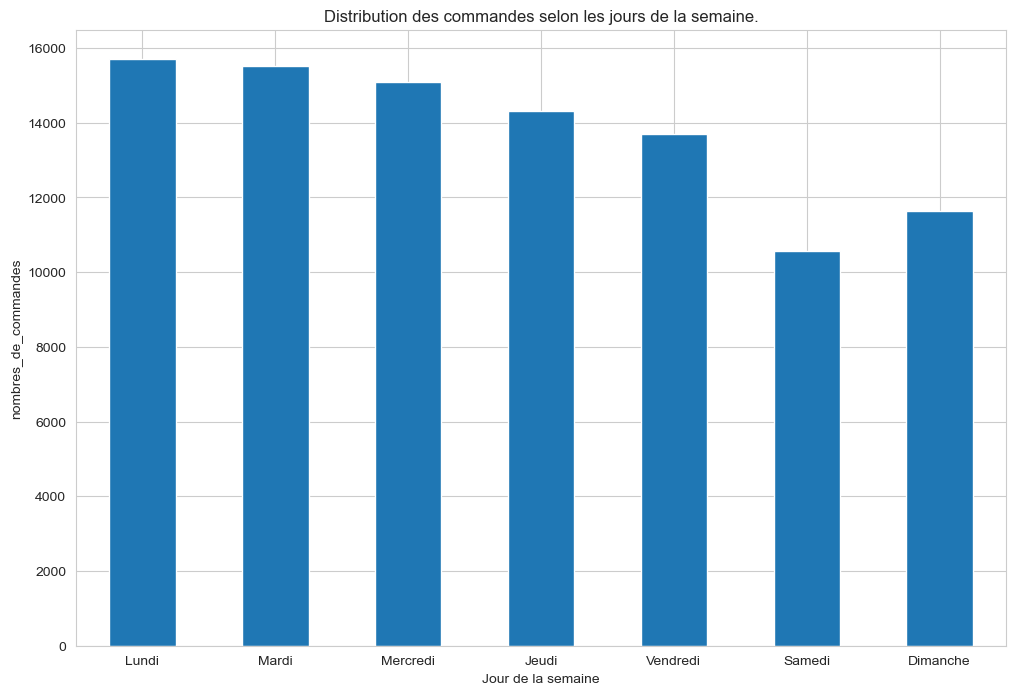

In [30]:
# Groupement par mois et comptage des commandes uniques par mois
order_items.groupby(order_items['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Distribution des commandes selon les jours de la semaine.",
          ylabel="nombres_de_commandes",
          xlabel="Jour de la semaine",
          legend=False)
plt.xticks(np.arange(0,7), ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'], rotation='horizontal')
plt.show()

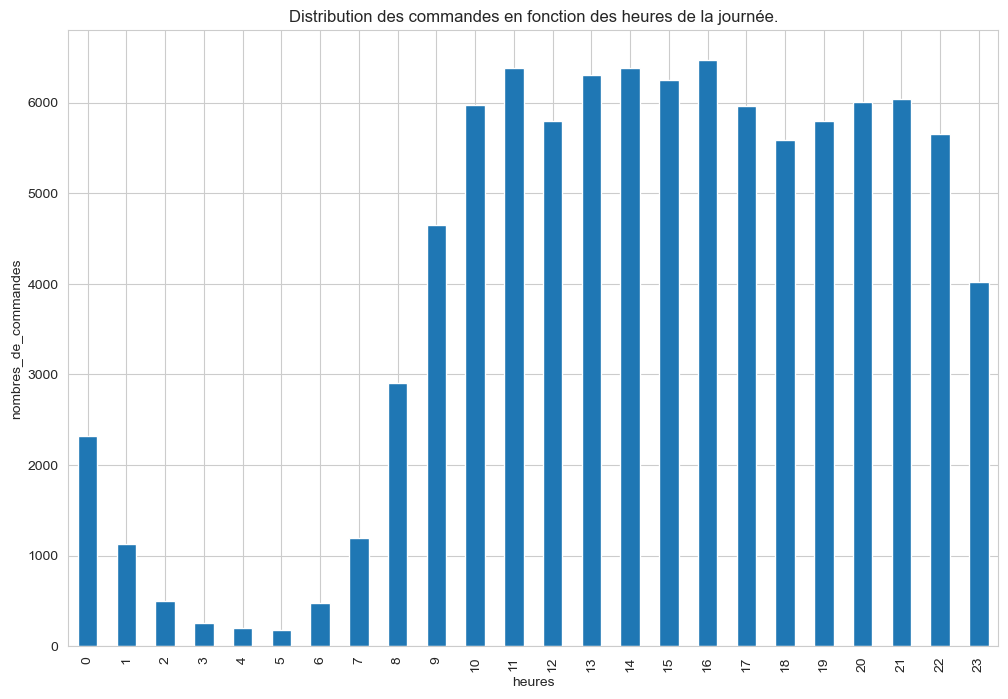

In [31]:
# Groupement par heure de la journée et comptage des commandes uniques par heure
order_items.groupby(order_items['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Distribution des commandes en fonction des heures de la journée.",
          ylabel="nombres_de_commandes",
          xlabel="heures",
          legend=False)
plt.show()

Des écarts plus significatifs sont observés dans les données mensuelles. Nous allons maintenant examiner les variations de chiffre d'affaires d'un mois à l'autre pour évaluer les variances.

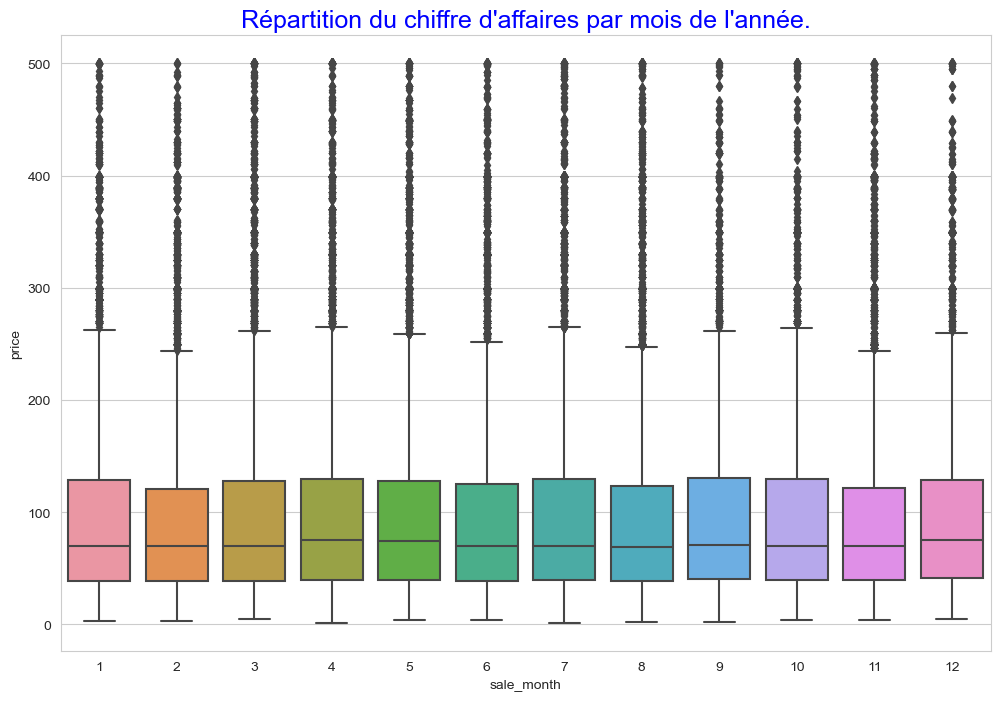

In [32]:
# Ajout d'une colonne "sale_month" pour le mois de vente
order_items["sale_month"] = order_items['order_purchase_timestamp'].dt.month
# Tracé d'un diagramme en boîte du chiffre d'affaires par mois de l'année
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=order_items[order_items.price < 500], x="sale_month", y="price")
plt.title("Répartition du chiffre d'affaires par mois de l'année.", fontsize=18, color="b")
plt.show()

Les médianes et les variances demeurent similaires à travers les différents mois de l'année. Pour l'instant, nous inclurons néanmoins cette donnée, mais il serait opportun de suivre l'évolution de cette distribution en vue de l'intégrer dans le cadre du contrat de maintenance.

Quant au jeu de données des paiements, nous allons introduire de nouvelles variables, à savoir :

- Le nombre de modes de paiement différents utilisés dans une commande.
- Le total des échéances pour une commande.

In [33]:
# Groupement des paiements par identifiant de commande et agrégation des variables
group_payments = order_payments.groupby(by="order_id").agg(
    {"payment_sequential": 'count',
     "payment_installments": 'sum'})
# Fusion des données des articles de commande avec les données de paiement agrégées
order_items = pd.merge(order_items, group_payments,
                       how="left",
                       on="order_id")
# Renommage des colonnes pour plus de clarté
order_items = order_items.rename(columns={
    "payment_sequential": "nb_payment_sequential",
    "payment_installments": "sum_payment_installments"})
# Affichage des 5 premières lignes du jeu de données des articles de commande
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0


Nous allons aussi examiner la distribution des modes de paiement utilisés afin de déterminer si cette information est pertinente pour nos analyses ou non :

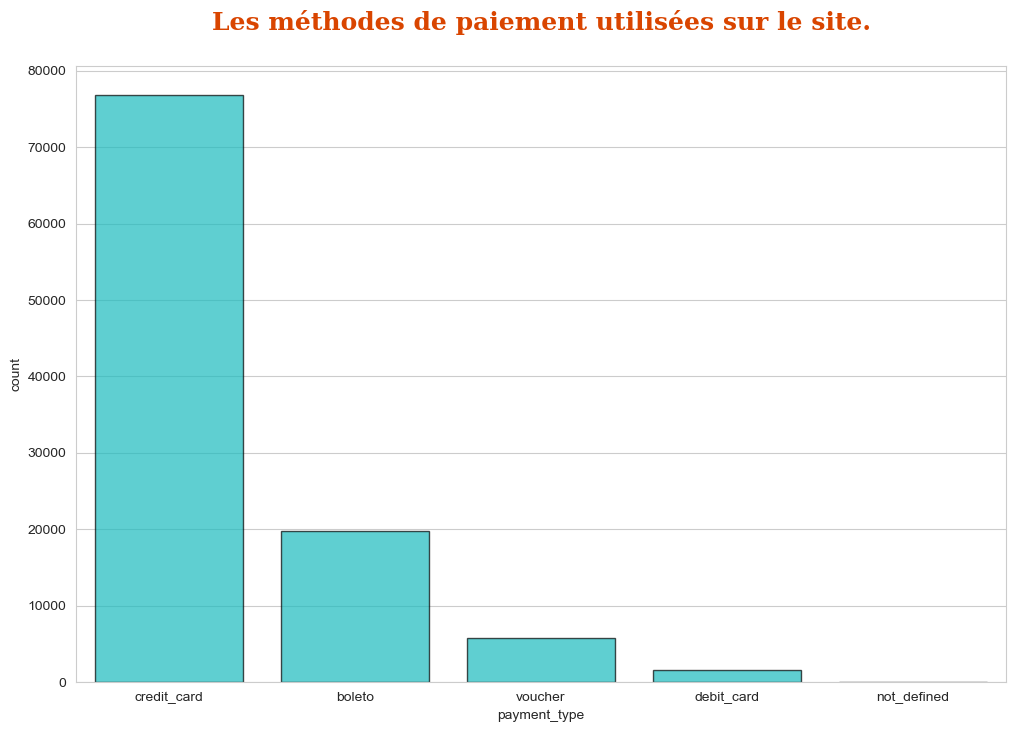

In [34]:
# Tracé du nombre de paiements par type de paiement
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=order_payments, x="payment_type",
              edgecolor="black",
              color="#00d5d9", alpha=0.7)
plt.title(f"Les méthodes de paiement utilisées sur le site.\n",
          fontdict=font_title)
plt.show()

On observe que près de 80 % des paiements sont effectués par carte bancaire. Par conséquent, nous exclurons cette variable de nos analyses exploratoires.

Concernant les avis des clients, nous allons aussi générer une nouvelle variable qui indiquera simplement si une commande a été évaluée (True ou False), ainsi qu'une seconde variable qui enregistrera la note attribuée.

In [35]:
# Groupement des avis par identifiant de commande et agrégation des variables
group_reviews = order_reviews.groupby("order_id").agg({
    "review_id": "count",
    "review_score": "mean",
    "comment_size": "mean"})
# Fusion des données des articles de commande avec les données d'avis agrégées
order_items = pd.merge(order_items, group_reviews,
                       how="left",
                       on="order_id")
# Renommage de la colonne "review_id" pour indiquer si une commande a été évaluée
order_items = order_items.rename(columns={
    "review_id": "is_reviewed"})
# Affichage des 5 premières lignes du jeu de données des articles de commande
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,comment_size
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,1.0,5.0,46.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,1.0,4.0,0.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,1.0,5.0,90.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,1.0,4.0,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,1.0,5.0,39.0


In [36]:
# Conversion des valeurs de la colonne "is_reviewed" en booléen
order_items["is_reviewed"] = np.where(order_items["is_reviewed"] == 1,
                                      True, False)

Maintenant, nous sommes en mesure de visualiser la distribution des notes attribuées aux commandes du site :

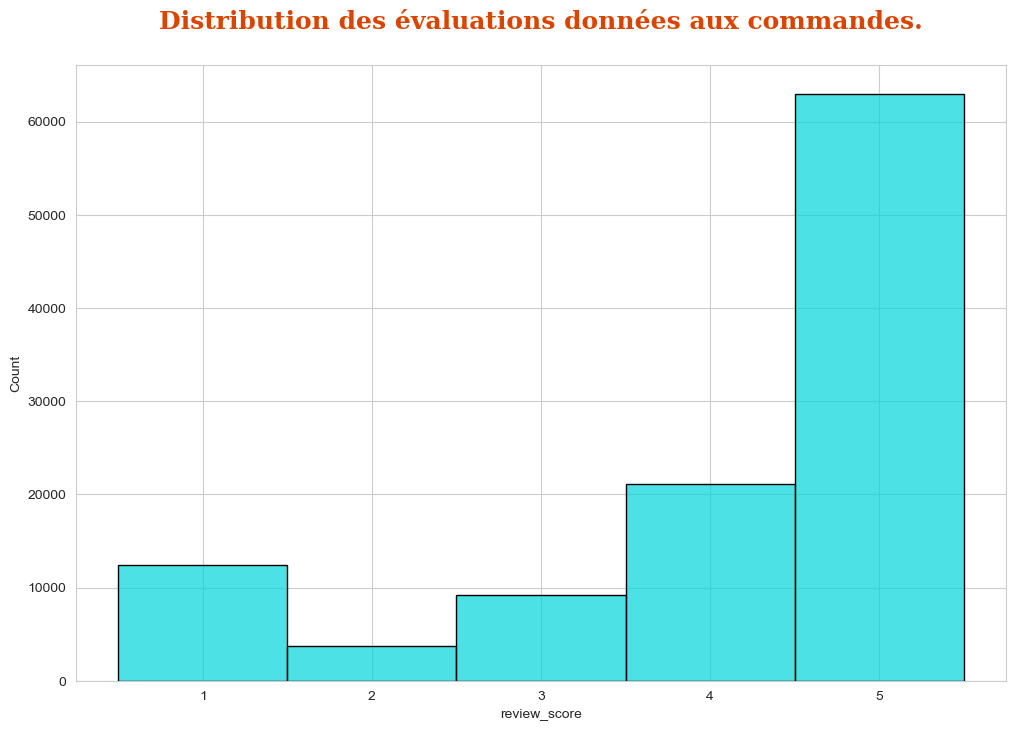

In [37]:
# Tracé de l'histogramme de la répartition des notes attribuées aux commandes
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=order_items, x="review_score", 
             discrete=True,
             edgecolor="black",
             color="#00d5d9", alpha=0.7)
plt.title(f"Distribution des évaluations données aux commandes.\n",
          fontdict=font_title)
plt.show()

Nous devons maintenant effectuer la jointure avec le fichier des clients :

In [38]:
# Fusion des données des articles de commande avec les données des clients
order_items = pd.merge(order_items, customers,
                       how="left",
                       on="customer_id")
# Affichage des 5 premières lignes du jeu de données des articles de commande
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,comment_size,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,True,5.0,46.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,True,4.0,0.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,True,5.0,90.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,True,4.0,0.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,True,5.0,39.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


Enfin, nous allons constituer le jeu de données global en effectuant une jonction avec les produits et les catégories :

In [39]:
# Fusion des données des articles de commande avec les données des produits
data = pd.merge(order_items, products,
               how="left",
               on="product_id")
# Affichage des 5 premières lignes du jeu de données combiné
data.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,...,review_score,comment_size,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,...,5.0,46.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,58.0,598.0,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,...,4.0,0.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,56.0,239.0,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,...,5.0,90.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,59.0,695.0,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,...,4.0,0.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,42.0,480.0,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,...,5.0,39.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59.0,409.0,1.0,garden_tools


In [40]:
# Affichage des informations sur le jeu de données combiné
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   sale_month                     110197 non-null  int64         
 10  nb_payment_sequential          110194 non-null  float64       
 11  

Feature engineering en fonction du client
Maintenant que notre jeu de données s'est élargi, nous allons recentrer les données autour du client plutôt que des commandes, en créant de nouvelles variables. Comme mentionné précédemment, l'identifiant unique du client se trouve dans la variable "customer_unique_id".

Commençons par créer une variable qui enregistre le délai de livraison pour chaque commande (et supprimons la variable "order_delivered_customer_date") :

In [41]:
# Calcul du nombre de jours entre la date de livraison et la date d'achat
data["delivery_delta_days"] = (data.order_delivered_customer_date
                               - data.order_purchase_timestamp)\
                              .dt.round('1d').dt.days
# Suppression de la colonne "order_delivered_customer_date"
data.drop("order_delivered_customer_date", axis=1, inplace=True)

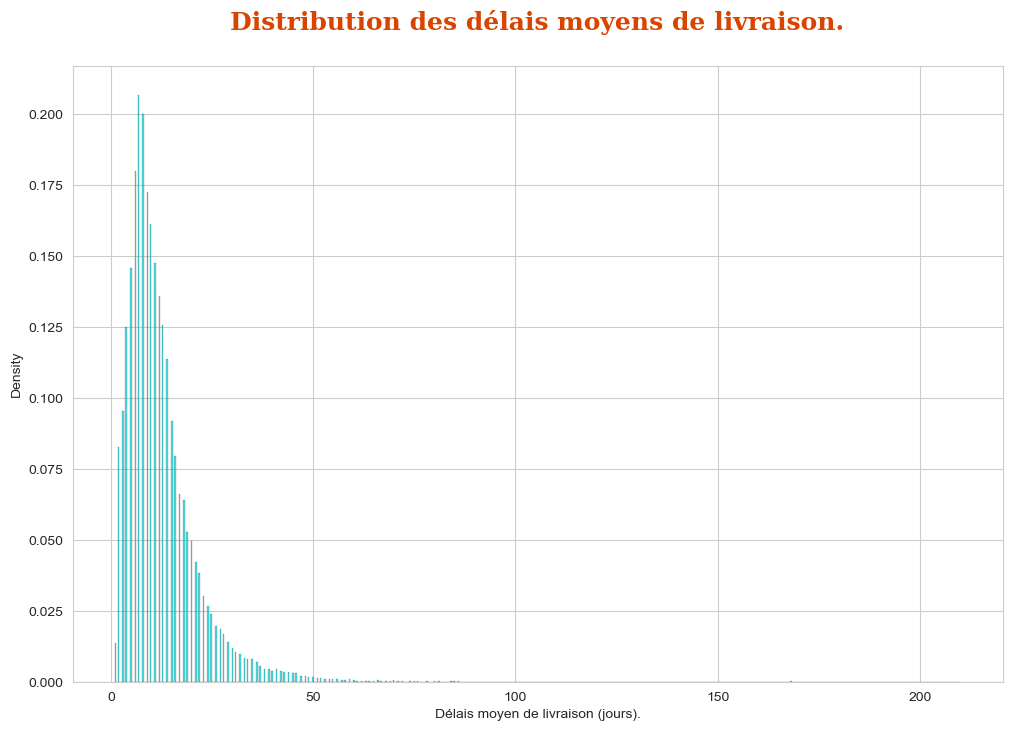

In [42]:
# Tracé de l'histogramme de la distribution des durées moyennes de livraison
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="delivery_delta_days",
             stat="density",
             edgecolor="black",
             color="#00d5d9", alpha=0.7)
plt.xlabel("Délais moyen de livraison (jours).")
plt.title(f"Distribution des délais moyens de livraison.\n",
          fontdict=font_title)
plt.show()

Une autre variable à générer est la catégorie de produit de premier niveau. En effet, le jeu de données contient plus de 70 catégories distinctes (ce qui peut causer des problèmes lors de l'encodage lors des prétraitements). Ainsi, nous devons consolider plusieurs de ces catégories en une catégorie de niveau supérieur. Pour ce faire, nous nous appuierons sur les principales catégories de produits en ligne de l'année 2017, telles que présentées sur le site référentiel:


- Mode, vêtements et accessoires
- Santé et beauté
- Jouets et équipement pour bébés
- Livres, CD et autres supports physiques
- Épicerie, alimentation et boissons
- Technologie (y compris téléphones et ordinateurs)
- Maison et mobilier
- Fleurs et cadeaux
- Autres
- Nous incluons également la catégorie sport. Nous devrons procéder à leur attribution manuelle :

In [43]:
# Création d'une nouvelle variable "product_category" basée sur le contenu de "product_category_name"
data['product_category'] = np.where((data['product_category_name'].str.contains("mode|luggage")==True),
                                    'mode_vêtements_accessoires',
                           np.where((data['product_category_name'].str.contains("sante|beaute|perfum")==True),
                                    'sante_beaute',
                           np.where((data['product_category_name'].str.contains("jouet|bebe|diaper")==True),
                                     'jouet_bebe',
                           np.where((data['product_category_name'].str.contains("livre|cd|dvd|media")==True),
                                     'livre_cd_media',
                           np.where((data['product_category_name'].str.contains("epicerie|alimentation|boissons")==True), 
                                     'epicerie_alimentation_boissons',
                           np.where((data['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technologie',
                           np.where((data['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'maison_mobilier',
                           np.where((data['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'fleurs_cadeaux',
                           np.where((data['product_category_name'].str.contains("sport")==True),
                                     'sport',
                                     'autres')))))))))

In [44]:
# Suppression de la colonne "product_category_name" car nous avons créé la variable "product_category"
data.drop("product_category_name", axis=1, inplace=True)

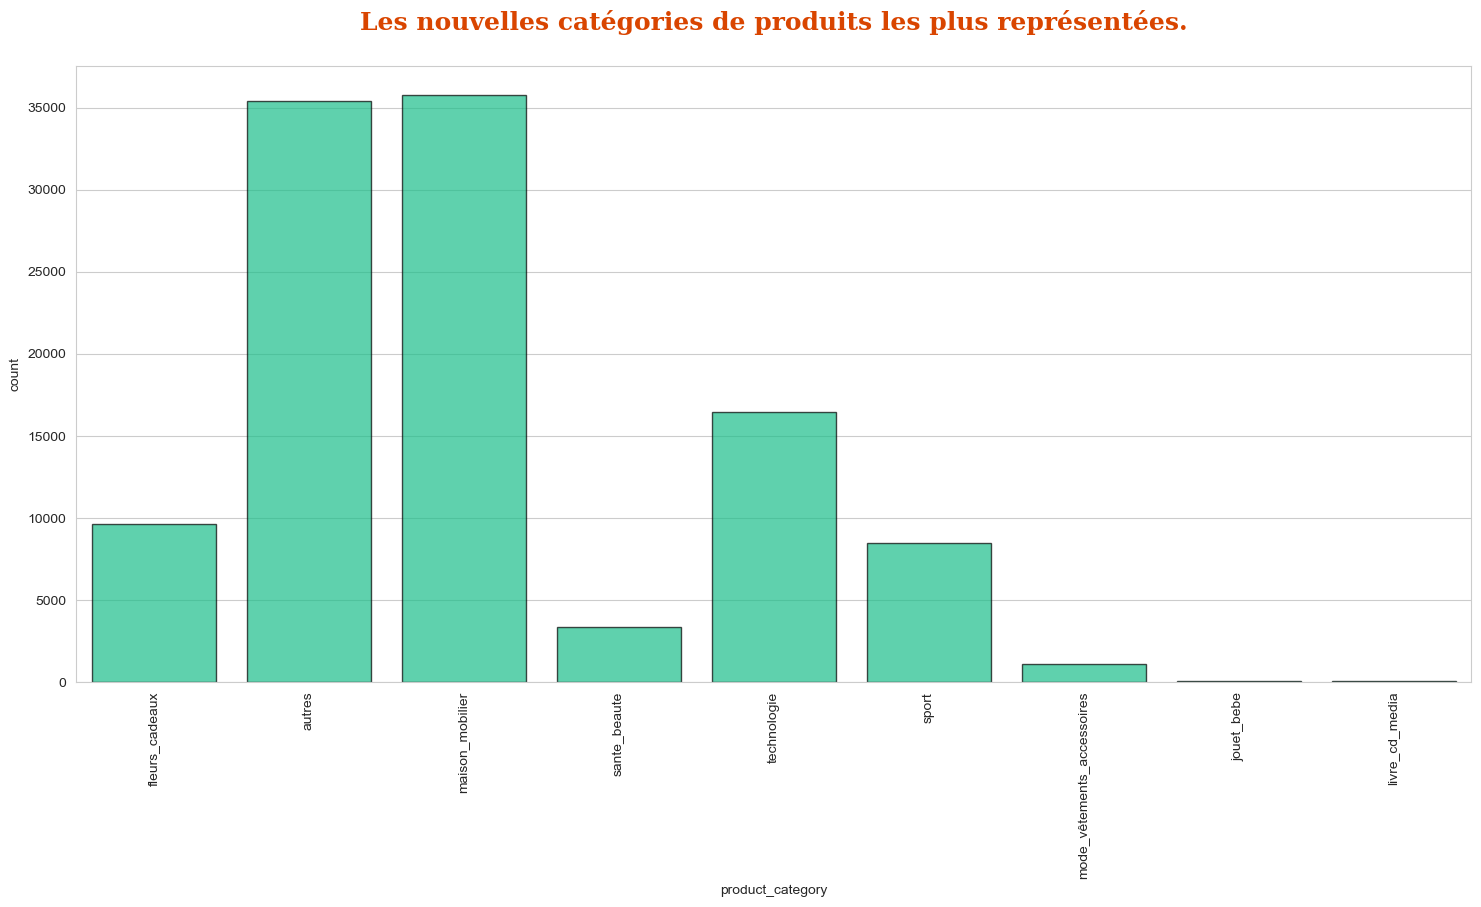

In [45]:
# Tracé du nombre de catégories de produits les plus représentées dans le jeu de données
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=data, x="product_category",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, data["product_category"].nunique()),
           data["product_category"].unique(),
           rotation=90)
plt.title(f"Les nouvelles catégories de produits les plus représentées.\n",
          fontdict=font_title)
plt.show()

Maintenant, nous avons la possibilité d'examiner la distribution de la moyenne du nombre de commandes par client :

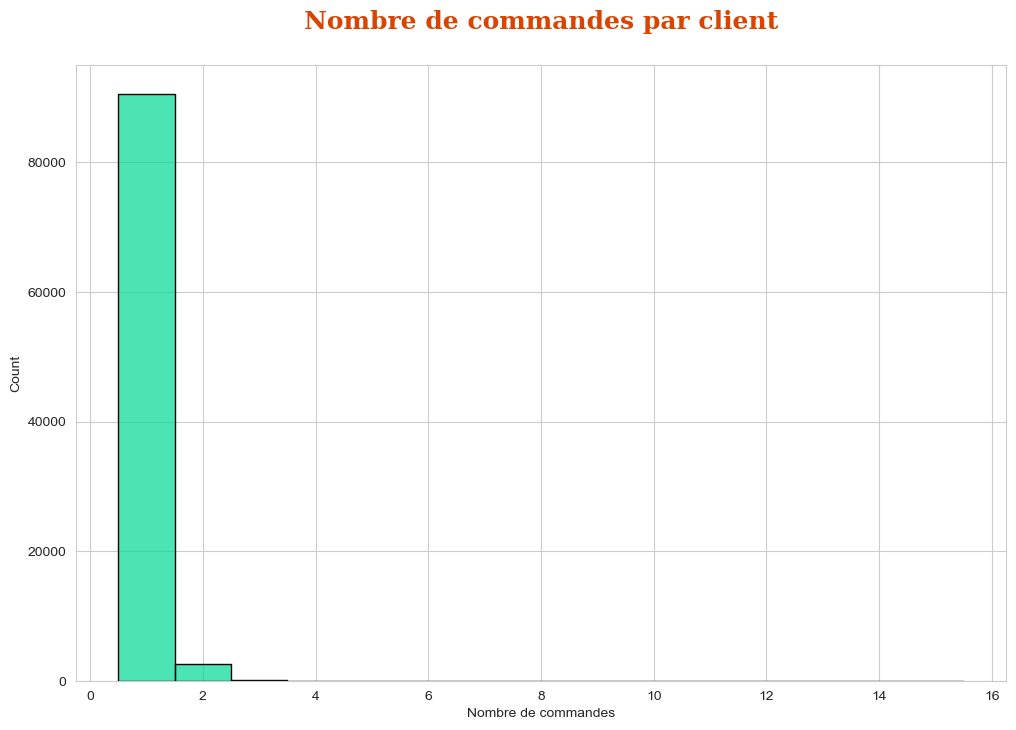

In [46]:
# Tracé de l'histogramme du nombre de commandes par client
fig = plt.figure(figsize=(12, 8))
sns.histplot(data.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             x="order_id",
             discrete=True,
             edgecolor="black",
             color="#00d994", alpha=0.7)
plt.xlabel("Nombre de commandes")
plt.title(f"Nombre de commandes par client\n",
          fontdict=font_title)
plt.show()

La grande majorité des clients ont effectué une seule commande, ce qui rend complexe l'établissement d'un classement pour leur catégorie de produit préférée. Ainsi, nous allons générer des variables pour chaque catégorie de produit, dans lesquelles nous répartirons le nombre d'articles achetés dans les commandes. Ensuite, nous calculerons le ratio du nombre d'articles par catégorie par rapport au nombre total d'articles achetés par le client.

In [47]:
# Groupement des catégories de produits par client et comptage des articles
categories_customers = data.groupby(["customer_unique_id", "product_category"])\
                        .agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace=True)
categories_customers["total_items"] = categories_customers.sum(axis=1)

# Calcul du ratio d'articles par catégorie par rapport au total d'articles
for col in categories_customers.columns:
    if (col != "total_items"):
        categories_customers[col] = (categories_customers[col]/categories_customers["total_items"])
# Réinitialisation de l'index
categories_customers.reset_index(inplace=True)
categories_customers.head(5)

product_category,customer_unique_id,autres,fleurs_cadeaux,jouet_bebe,livre_cd_media,maison_mobilier,mode_vêtements_accessoires,sante_beaute,sport,technologie,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [48]:
# Supprimer les colonnes col1 et col2
columns_to_drop = ['autres', 'fleurs_cadeaux','jouet_bebe','livre_cd_media','maison_mobilier','mode_vêtements_accessoires',
                  'sante_beaute','sport','technologie','total_items']
categories_customers = categories_customers.drop(columns=columns_to_drop)

Ensuite, nous allons procéder au calcul de la moyenne du nombre d'articles par commande pour chaque client :

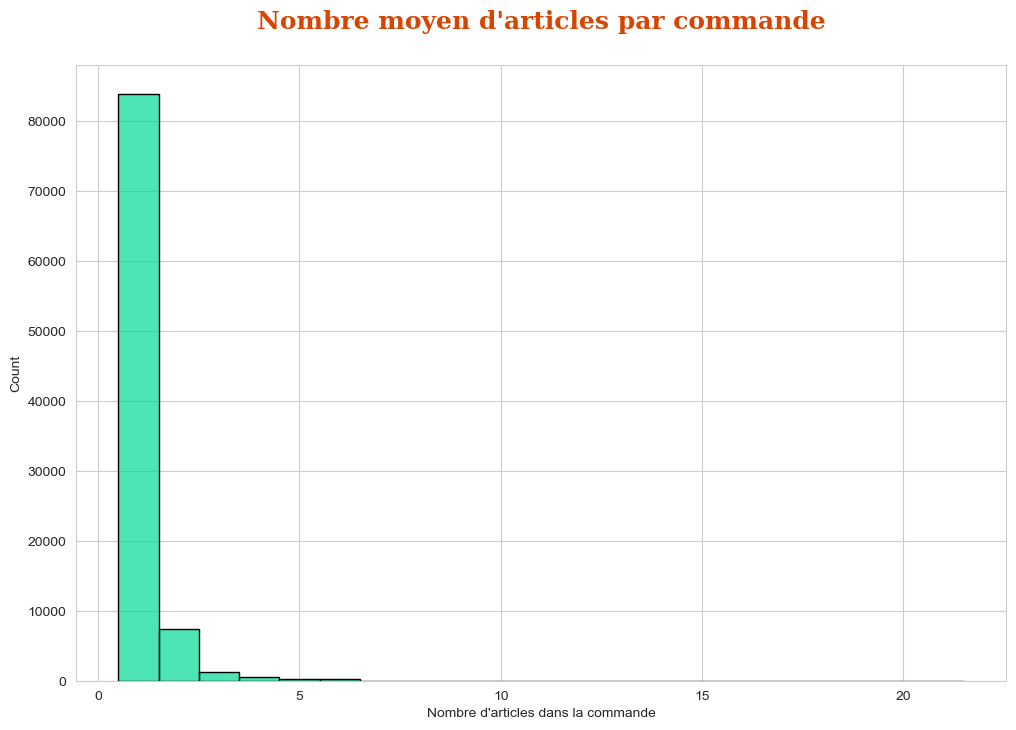

In [49]:
# Groupement par client et calcul du nombre moyen d'articles par commande
products_per_order = data.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})

# Tracé de la densité du nombre d'articles dans une commande
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = products_per_order,
             x="order_item_id",
             discrete=True,
             edgecolor="black",
             color="#00d994", alpha=0.7)
plt.xlabel("Nombre d'articles dans la commande")
plt.title(f"Nombre moyen d'articles par commande\n",
          fontdict=font_title)
plt.show()

Maintenant, nous allons estimer le nombre de jours qui se sont écoulés entre la première et la dernière commande. Ensuite, nous allons ajuster cette durée en fonction du nombre total de commandes du client.

In [50]:
# Groupement par client et calcul des dates de première et dernière commandes
recurencies = data.groupby("customer_unique_id")\
                .agg({"order_purchase_timestamp": ["min","max"]})
recurencies.columns = recurencies.columns.droplevel(0)

# Date maximale dans le jeu de données
max_date = data["order_purchase_timestamp"].max()

# Calcul du délai depuis la dernière commande
recurencies["order_total_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0] 
                                    else (max_date - y[0]).round('1d').days 
                                    for x,y in recurencies.iterrows()]
recurencies.drop(["min", "max"], axis=1, inplace=True)
recurencies.head(5)

,order_total_delay
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,537
0000f6ccb0745a6a4b88665a16c9f078,321
0004aac84e0df4da2b147fca70cf8255,288


### Création du dataset clients

In [51]:
# Groupement par client avec les opérations appropriées
data = data.groupby("customer_unique_id")\
            .agg({"order_id": "nunique",
                  "price": "sum",
                  "order_purchase_timestamp": "max",  # Utilisation de 'max' pour obtenir la date la plus récente
                  "nb_payment_sequential": "mean", 
                  "sum_payment_installments": "mean", 
                  "review_score": "mean",
                  "comment_size": "mean",
                  "delivery_delta_days": "mean",
                  "sale_month": lambda x: x.value_counts().index[0]})

# Renommage des colonnes
data = data.rename(columns={"order_id": "nombre_de_commandes",
                            "price": "note_par_commande",
                            "order_purchase_timestamp": "date_derniere_commande",
                            "nb_payment_sequential": "paye_par_commande",
                            "sum_payment_installments": "nb_paye_par_commande",
                            "review_score": "mean_note_de_commentaire",
                            "comment_size": "mean_taille_de_commentaire",
                            "delivery_delta_days": "delai",
                            "sale_month": "mois_de_vente"})

# Fusion avec d'autres caractéristiques calculées
data = pd.merge(data, categories_customers,
                how="left",
                on="customer_unique_id")

data = pd.merge(data, products_per_order,
                how="left",
                on="customer_unique_id")\
        .rename(columns={"order_item_id": "mean_nombre_articles"})

data = pd.merge(data, recurencies,
                how="left",
                on="customer_unique_id")

data.head(5)

,customer_unique_id,nombre_de_commandes,note_par_commande,date_derniere_commande,paye_par_commande,nb_paye_par_commande,mean_note_de_commentaire,mean_taille_de_commentaire,delai,mois_de_vente,mean_nombre_articles,order_total_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,2018-05-10 10:56:27,1.0,8.0,5.0,111.0,6.0,5,1.0,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,2018-05-07 11:11:27,1.0,1.0,4.0,0.0,3.0,5,1.0,114
2,0000f46a3911fa3c0805444483337064,1,69.00,2017-03-10 21:05:03,1.0,8.0,3.0,0.0,26.0,3,1.0,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,2017-10-12 20:29:41,1.0,4.0,4.0,12.0,20.0,10,1.0,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,2017-11-14 19:45:42,1.0,6.0,5.0,0.0,13.0,11,1.0,288


Comme mentionné précédemment, nous allons normaliser les délais entre les commandes des clients en fonction du nombre de commandes, afin d'obtenir le délai moyen entre des achats successifs :

In [52]:
# Calcul du délai moyen de commande par client
data["order_total_delay"] = data["order_total_delay"] / data["nombre_de_commandes"]
data = data.rename(columns={"order_total_delay": "mean_délai_de_commande"})

Nous avons maintenant la tâche de calculer quelques dernières variables pour une meilleure représentation :

- Le rapport entre les frais de port et le montant total de la commande
- La moyenne des prix par commande

In [53]:
# Calcul du rapport de fret et du prix moyen par commande
data["livraison_par_commande"] = round(data["delai"] / (data["note_par_commande"] + data["delai"]),2)
data["mean_prix_commande"] = round(data["note_par_commande"] / data["nombre_de_commandes"],2)
data["note_par_commande"] = (data["note_par_commande"] + data["delai"])
data.drop("delai", axis=1, inplace=True)

Pour conclure, nous allons intégrer les informations de localisation des clients :

In [54]:
# Suppression de la colonne "customer_id" dans le dataframe customers
customers.drop("customer_id", axis=1, inplace=True)
# Sélection des valeurs les plus fréquentes pour chaque client dans le dataframe customers
customers_info = customers.groupby("customer_unique_id").agg(lambda x:x.value_counts().index[0])
# Jointure avec le dataframe data
data = pd.merge(data, customers_info,
                how="left",
                on="customer_unique_id")

### Exploration du dataset client
Nous disposons désormais de notre jeu de données complété en vue de la segmentation de la clientèle. Avant d'aller plus loin, effectuons une brève exploration de ces données :

In [55]:
# Affichage des cinq premières lignes du dataframe data
data.head(5)

,customer_unique_id,nombre_de_commandes,note_par_commande,date_derniere_commande,paye_par_commande,nb_paye_par_commande,mean_note_de_commentaire,mean_taille_de_commentaire,mois_de_vente,mean_nombre_articles,mean_délai_de_commande,livraison_par_commande,mean_prix_commande,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,135.90,2018-05-10 10:56:27,1.0,8.0,5.0,111.0,5,1.0,111.0,0.04,129.90,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,21.90,2018-05-07 11:11:27,1.0,1.0,4.0,0.0,5,1.0,114.0,0.14,18.90,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,95.00,2017-03-10 21:05:03,1.0,8.0,3.0,0.0,3,1.0,537.0,0.27,69.00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,45.99,2017-10-12 20:29:41,1.0,4.0,4.0,12.0,10,1.0,321.0,0.43,25.99,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,193.00,2017-11-14 19:45:42,1.0,6.0,5.0,0.0,11,1.0,288.0,0.07,180.00,18040,sorocaba,SP


In [56]:
# Affichage des informations sur le dataframe data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_unique_id          93358 non-null  object        
 1   nombre_de_commandes         93358 non-null  int64         
 2   note_par_commande           93350 non-null  float64       
 3   date_derniere_commande      93358 non-null  datetime64[ns]
 4   paye_par_commande           93357 non-null  float64       
 5   nb_paye_par_commande        93357 non-null  float64       
 6   mean_note_de_commentaire    92755 non-null  float64       
 7   mean_taille_de_commentaire  92755 non-null  float64       
 8   mois_de_vente               93358 non-null  int64         
 9   mean_nombre_articles        93358 non-null  float64       
 10  mean_délai_de_commande      93358 non-null  float64       
 11  livraison_par_commande      93350 non-null  float64   

In [57]:
# Trouver les caractéristiques à remplir et remplir avec le mode
features_to_fill = data.isnull().sum()
features_to_fill = list(features_to_fill[features_to_fill.values > 0].index)
# Remplissage avec le mode
for f in features_to_fill:
    data[f] = data[f].fillna(data[f].mode()[0])
    print(f, data[f].mode()[0])

note_par_commande 77.9
paye_par_commande 1.0
nb_paye_par_commande 1.0
mean_note_de_commentaire 5.0
mean_taille_de_commentaire 0.0
livraison_par_commande 0.04


In [58]:
# Affichage des statistiques descriptives du dataframe data
data.describe()

,nombre_de_commandes,note_par_commande,paye_par_commande,nb_paye_par_commande,mean_note_de_commentaire,mean_taille_de_commentaire,mois_de_vente,mean_nombre_articles,mean_délai_de_commande,livraison_par_commande,mean_prix_commande,customer_zip_code_prefix
count,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000
mean,1.033420,154.138502,1.043872,2.965951,4.158806,27.260485,6.034759,1.139531,232.502018,0.142971,137.508262,35243.998340
std,0.209097,216.426820,0.364435,2.717719,1.278290,47.145093,3.226430,0.527075,154.187659,0.125417,209.860281,29843.212881
min,1.000000,6.200000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.850000,1003.000000
25%,1.000000,57.990000,1.000000,1.000000,4.000000,0.000000,3.000000,1.000000,108.000000,0.050000,46.000000,11410.000000
50%,1.000000,101.000000,1.000000,2.000000,5.000000,0.000000,6.000000,1.000000,212.000000,0.100000,86.990000,24455.000000
75%,1.000000,168.900000,1.000000,4.000000,5.000000,40.000000,8.000000,1.000000,342.000000,0.190000,149.900000,59075.000000
max,15.000000,13458.000000,26.000000,26.000000,5.000000,208.000000,12.000000,21.000000,713.000000,0.950000,13440.000000,99980.000000


Dans cette description, il est également notable qu'il existe une commande d'une valeur dépassant les 13 000 dollars. Nous allons procéder à la vérification de cette commande atypique :

In [59]:
# Sélection des lignes du dataframe data avec la valeur maximale de la colonne "mean_prix_commande"
data[data["mean_prix_commande"] == data["mean_prix_commande"].max()]

,customer_unique_id,nombre_de_commandes,note_par_commande,date_derniere_commande,paye_par_commande,nb_paye_par_commande,mean_note_de_commentaire,mean_taille_de_commentaire,mois_de_vente,mean_nombre_articles,mean_délai_de_commande,livraison_par_commande,mean_prix_commande,customer_zip_code_prefix,customer_city,customer_state
3724,0a0a92112bd4c708ca5fde585afaa872,1,13458.0,2017-09-29 15:24:52,1.0,1.0,1.0,65.0,9,8.0,334.0,0.0,13440.0,20080,rio de janeiro,RJ


Cette commande comprend 8 articles technologiques d'une valeur totale de 13 000 dollars. Bien que cela puisse sembler atypique, il n'y a pas de raison de considérer ces données comme aberrantes. Par conséquent, nous les maintenons.

Examinons maintenant la répartition des montants moyens des commandes en fonction du nombre d'articles afin de détecter d'autres éventuelles anomalies :

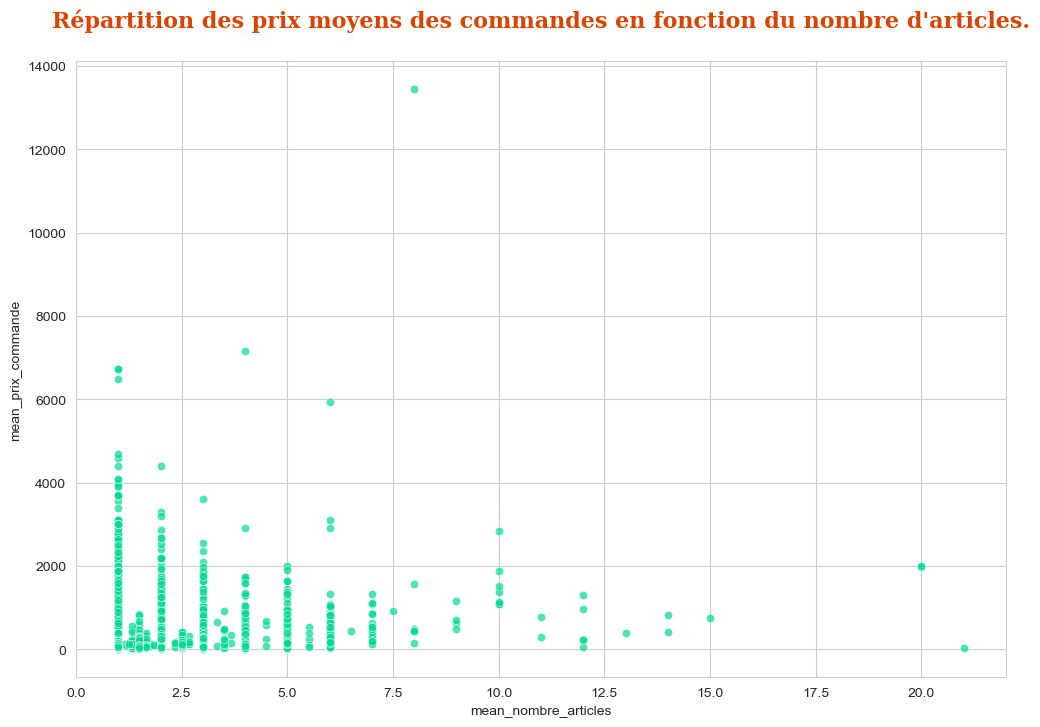

In [60]:
# Création d'un graphique de dispersion pour visualiser la relation entre le prix moyen des commandes et le nombre moyen d'articles
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, y="mean_prix_commande", x="mean_nombre_articles",
                color="#00d994", alpha=0.7)
plt.title(f"Répartition des prix moyens des commandes en fonction du nombre d'articles.\n",
          fontdict=font_title, fontsize=16)
plt.show()

Une commande de plus de 20 articles est enregistrée avec un montant presque nul

In [61]:
# Filtrage des données pour afficher les clients ayant un nombre moyen d'articles supérieur à 20
data[data["mean_nombre_articles"] > 20]

,customer_unique_id,nombre_de_commandes,note_par_commande,date_derniere_commande,paye_par_commande,nb_paye_par_commande,mean_note_de_commentaire,mean_taille_de_commentaire,mois_de_vente,mean_nombre_articles,mean_délai_de_commande,livraison_par_commande,mean_prix_commande,customer_zip_code_prefix,customer_city,customer_state
25309,4546caea018ad8c692964e3382debd19,1,46.8,2017-07-16 18:19:25,1.0,2.0,1.0,75.0,7,21.0,409.0,0.32,31.8,5882,sao paulo,SP


Encore une fois, il s'agit d'une valeur atypique mais non aberrante.

#####  Codage numérique (Notes) :


On attribue des valeurs numériques aux notes laissées sur les produits (par exemple, de 1 à 5), on créé un histogramme pour visualiser la distribution des notes.

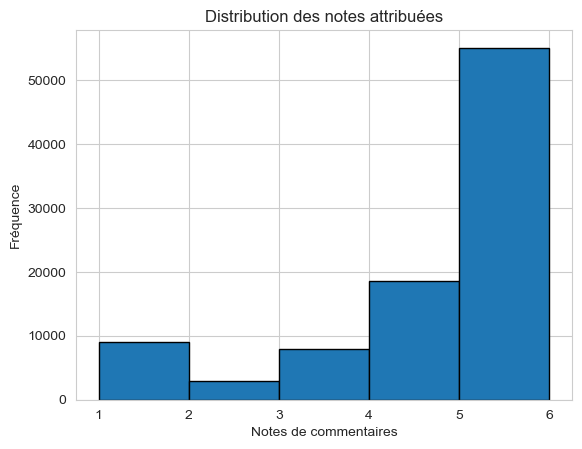

In [62]:
# Supposons que les notes sont dans une colonne appelée "mean_note_de_commentaire"
plt.hist(data['mean_note_de_commentaire'], bins=5, range=(1, 6), edgecolor='black')
plt.xlabel('Notes de commentaires')
plt.ylabel('Fréquence')
plt.title('Distribution des notes attribuées')
plt.show()

##### Codage binaire (Commentaires) :


On créé une variable binaire pour indiquer si un commentaire a été laissé ou non, on créer un diagramme en barres pour visualiser la fréquence des commentaires par rapport à l'absence de commentaires.

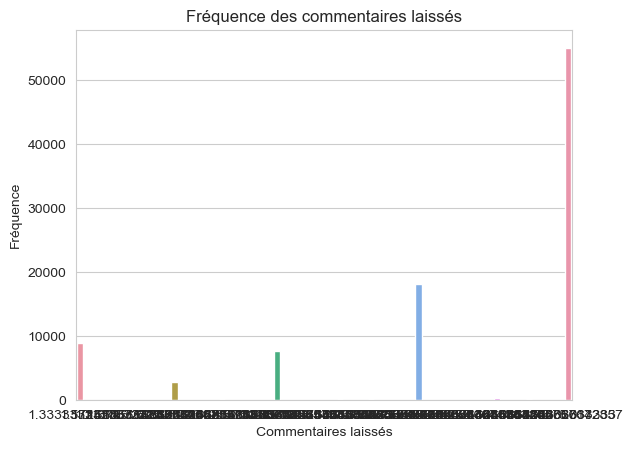

In [63]:
# Supposons que la variable binaire est dans une colonne appelée "commentaires"
sns.countplot(x='mean_note_de_commentaire', data=data)
plt.xlabel('Commentaires laissés')
plt.ylabel('Fréquence')
plt.title('Fréquence des commentaires laissés')
plt.show()


##### Texte brut (Commentaires) :


On stock les commentaires sous forme de texte brut, pour afficher quelques exemples de commentaires pour donner un aperçu.

In [64]:
# Supposons que les commentaires sont dans une colonne appelée "commentaires"
sample_comments = data['mean_note_de_commentaire'].sample(5)  # Sélectionnez quelques commentaires aléatoirement
for comment in sample_comments:
    print(comment)


5.0
5.0
5.0
5.0
2.0


#### Les différents états du fichier client :
Dans cette section, nous allons examiner l'origine géographique des clients et évaluer si cette localisation a une influence sur les ventes.

In [65]:
# Affichage des états uniques des clients
data["customer_state"].unique()

array(['SP', 'SC', 'PA', 'PR', 'RJ', 'MA', 'ES', 'RS', 'MG', 'GO', 'DF',
       'BA', 'MT', 'SE', 'TO', 'PE', 'CE', 'AL', 'AC', 'PI', 'PB', 'RN',
       'AM', 'MS', 'AP', 'RO', 'RR'], dtype=object)

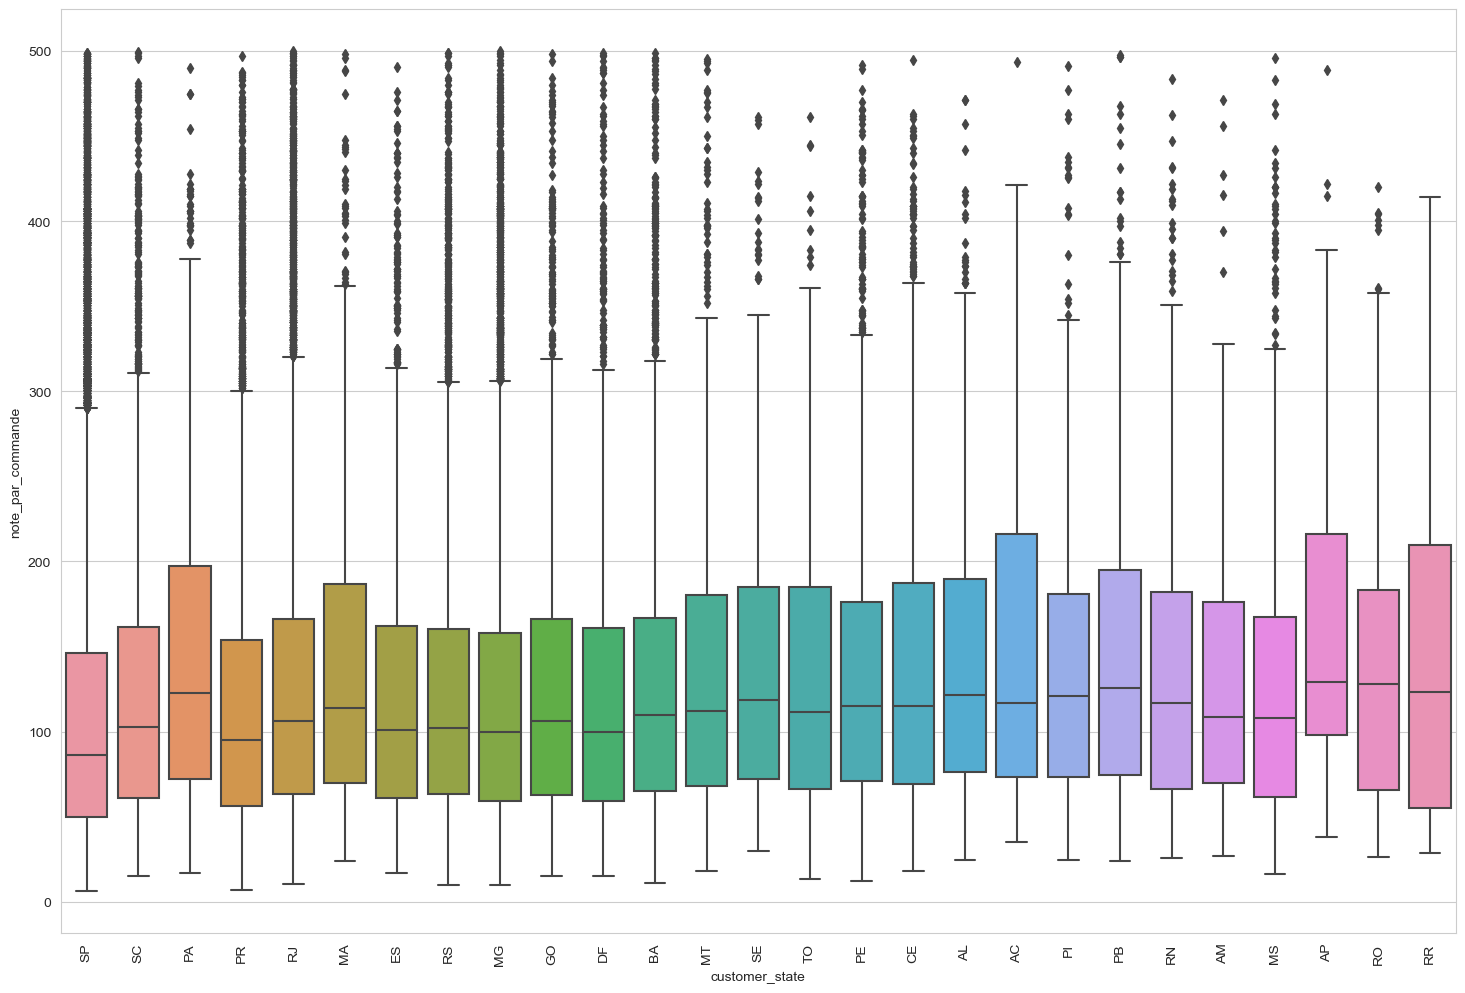

In [66]:
# Boîtes à moustaches des dépenses totales par état
fig = plt.figure(figsize=(18,12))
sns.boxplot(x="customer_state", y="note_par_commande", 
            data=data[data["note_par_commande"]<500])
plt.xticks(rotation=90)
plt.show()

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_6084/3763292026.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


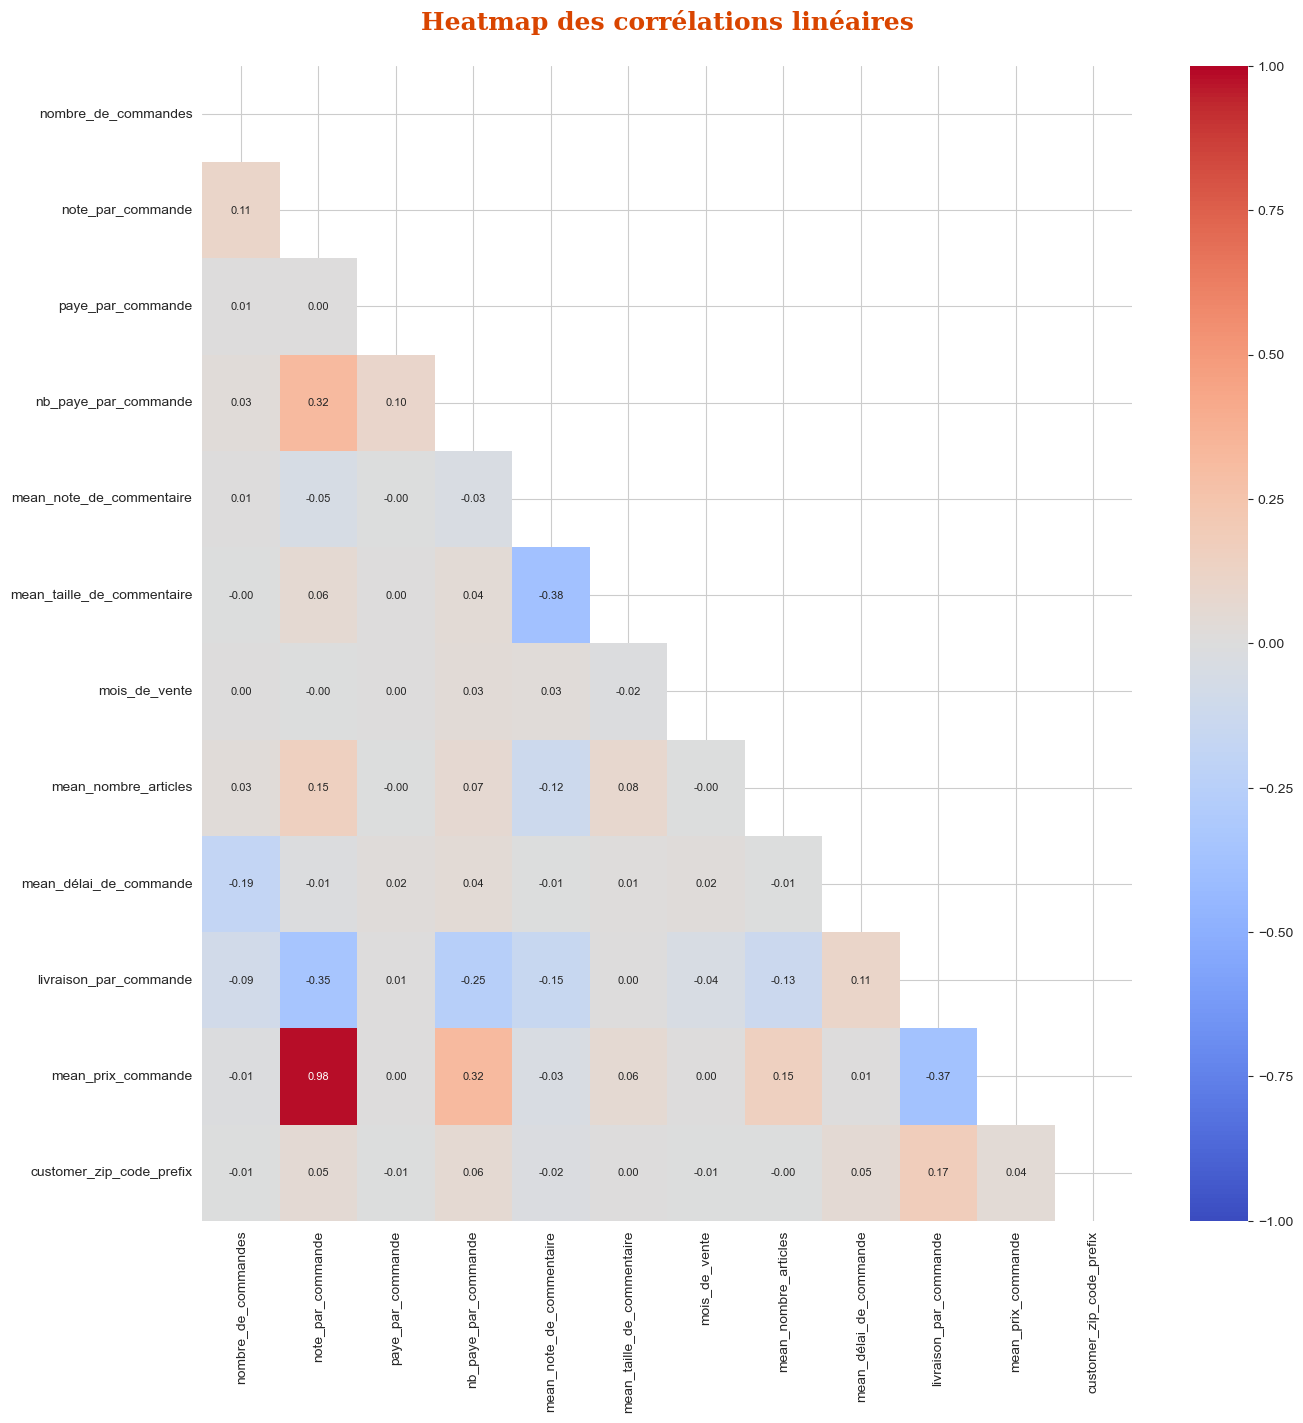

In [67]:
# Matrice de corrélation et heatmap
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

- On peut observer une corrélation significative entre le montant total et le prix moyen par commande, ainsi qu'entre le nombre moyen d'articles et le nombre total d'articles. Cette relation s'explique par le fait que la majorité des clients ont effectué une seule commande. Cette corrélation devrait s'atténuer au fil du temps pour cette variable.

In [68]:
# Affichage des dix premières lignes du dataframe data
data.head(10)

,customer_unique_id,nombre_de_commandes,note_par_commande,date_derniere_commande,paye_par_commande,nb_paye_par_commande,mean_note_de_commentaire,mean_taille_de_commentaire,mois_de_vente,mean_nombre_articles,mean_délai_de_commande,livraison_par_commande,mean_prix_commande,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,135.90,2018-05-10 10:56:27,1.0,8.0,5.0,111.0,5,1.0,111.0,0.04,129.90,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,21.90,2018-05-07 11:11:27,1.0,1.0,4.0,0.0,5,1.0,114.0,0.14,18.90,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,95.00,2017-03-10 21:05:03,1.0,8.0,3.0,0.0,3,1.0,537.0,0.27,69.00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,45.99,2017-10-12 20:29:41,1.0,4.0,4.0,12.0,10,1.0,321.0,0.43,25.99,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,193.00,2017-11-14 19:45:42,1.0,6.0,5.0,0.0,11,1.0,288.0,0.07,180.00,18040,sorocaba,SP
5,0004bd2a26a76fe21f786e4fbd80607f,1,156.00,2018-04-05 19:33:16,1.0,8.0,4.0,0.0,4,1.0,146.0,0.01,154.00,5036,sao paulo,SP
6,00050ab1314c0e55a6ca13cf7181fecf,1,34.99,2018-04-20 12:57:23,1.0,1.0,4.0,0.0,4,1.0,131.0,0.20,27.99,13084,campinas,SP
7,00053a61a98854899e70ed204dd4bafe,1,398.00,2018-02-28 11:15:41,1.0,3.0,1.0,198.0,2,2.0,182.0,0.04,382.00,80410,curitiba,PR
8,0005e1862207bf6ccc02e4228effd9a0,1,139.00,2017-03-04 23:32:12,1.0,3.0,4.0,0.0,3,1.0,543.0,0.03,135.00,25966,teresopolis,RJ
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1,158.90,2018-03-12 15:22:12,1.0,4.0,1.0,122.0,3,1.0,170.0,0.34,104.90,65060,sao luis,MA


#### Exportation du jeu de données final en vue d'une classification non supervisée. 


En utilisant l'ensemble de ces caractéristiques, nous allons modéliser les données en appliquant plusieurs algorithmes de classification non supervisée. Ces étapes seront exécutées dans un carnet de notes distinct dédié à la segmentation des clients d'un site e-commerce, dénommé NB2.

In [69]:
# Exporte les données traitées et filtrées vers un fichier CSV pour la modélisation ultérieure.
data.to_csv("data-clean-modelisation.csv")